# <a href="https://mipt-stats.gitlab.io/courses/ad_mipt.html">Phystech@DataScience</a>
## Домашнее задание 4

**Правила, <font color="red">прочитайте внимательно</font>:**

* Выполненную работу нужно отправить телеграм-боту `@miptstats_pds_bot`. Для начала работы с ботом каждый раз отправляйте `/start`. **Работы, присланные иным способом, не принимаются.**
* Дедлайн см. в боте. После дедлайна работы не принимаются кроме случаев наличия уважительной причины.
* Прислать нужно ноутбук в формате `ipynb`.
* Выполнять задание необходимо полностью самостоятельно. **При обнаружении списывания все участники списывания будут сдавать устный зачет.**
* Решения, размещенные на каких-либо интернет-ресурсах, не принимаются. Кроме того, публикация решения в открытом доступе может быть приравнена к предоставлении возможности списать.
* Для выполнения задания используйте этот ноутбук в качестве основы, ничего не удаляя из него. Можно добавлять необходимое количество ячеек.
* Комментарии к решению пишите в markdown-ячейках.
* Выполнение задания (ход решения, выводы и пр.) должно быть осуществлено на русском языке.
* Если код будет не понятен проверяющему, оценка может быть снижена.
* Никакой код из данного задания при проверке запускаться не будет. *Если код студента не выполнен, недописан и т.д., то он не оценивается.*
* **Код из рассказанных на занятиях ноутбуков можно использовать без ограничений.**

**Правила оформления теоретических задач:**

* Решения необходимо прислать одним из следующих способов:
  * фотографией в правильной ориентации, где все четко видно, а почерк разборчив,
    * отправив ее как файл боту вместе с ноутбуком *или*
    * вставив ее в ноутбук посредством `Edit -> Insert Image` (<font color="red">фото, вставленные ссылкой, не принимаются</font>);
  * в виде $LaTeX$ в markdown-ячейках.
* Решения не проверяются, если какое-то требование не выполнено. Особенно внимательно все проверьте в случае выбора второго пункта (вставки фото в ноутбук). <font color="red"><b>Неправильно вставленные фотографии могут не передаться при отправке.</b></font> Для проверки попробуйте переместить `ipynb` в другую папку и открыть его там.
* В решениях поясняйте, чем вы пользуетесь, хотя бы кратко. Например, если пользуетесь независимостью, то достаточно подписи вида "*X и Y незав.*"
* Решение, в котором есть только ответ, и отсутствуют вычисления, оценивается в 0 баллов.

**Баллы за задание:**

<b><font color="blue">Легкая часть</font></b> (достаточно на "хор"):
* Задача 1 &mdash; 20 баллов
* Задача 2 &mdash; 15 баллов
* Задача 3 &mdash; 15 баллов

<b><font color="orange">Сложная часть</font></b> (необходимо на "отл"):
* Задача 4 &mdash; 20 баллов
* Задача 5 &mdash; 30 баллов





-----

In [2]:
import numpy as np
import scipy.stats as sps
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
sns.set(font_scale=1.3, palette='Set2')

red = '#FF3300'
blue = '#0099CC'
green = '#00CC66'

%matplotlib inline

### <b><font color="blue">Легкая часть</font></b> 


## Задача 1 на гистограммы и  выборочные статистики.

**1.** Загрузите с помощью `pandas` из файла `airquality.csv` данные о качестве воздуха в Нью-Йорке с мая по сентябрь 1973 года по дням. Данные содержат измерения нескольких величин, описания которых можно прочитать [по ссылке](https://www.rdocumentation.org/packages/datasets/versions/3.5.1/topics/airquality).

In [3]:
# ваш код
df = pd.read_csv('airquality.csv')

In [4]:
df

,Ozone,Solar.R,Wind,Temp,Month,Day
0,41.0,190.0,7.4,67,5,1
1,36.0,118.0,8.0,72,5,2
2,12.0,149.0,12.6,74,5,3
3,18.0,313.0,11.5,62,5,4
4,NaN,NaN,14.3,56,5,5
...,...,...,...,...,...,...
148,30.0,193.0,6.9,70,9,26
149,NaN,145.0,13.2,77,9,27
150,14.0,191.0,14.3,75,9,28
151,18.0,131.0,8.0,76,9,29


Выведите описательные статистики (метод `describe`) для всех признаков, для которых это имеет смысл.  Округлите до второго знака после запятой.

In [5]:
# ваш код
import scipy.stats
import functools  
# ваш код
# наибольшое число выбросов соответствует озону

mean_std = functools.partial(scipy.stats.sem, nan_policy='omit')

pd.set_option('display.float_format', lambda x: '%.2f' % x)
d= df[['Ozone','Solar.R','Wind','Temp']].describe()
d.loc['mean_std'] = df[['Ozone','Solar.R','Wind','Temp']].agg(mean_std)
d

,Ozone,Solar.R,Wind,Temp
count,116.00,146.00,153.00,153.00
mean,42.13,185.93,9.96,77.88
std,32.99,90.06,3.52,9.47
min,1.00,7.00,1.70,56.00
25%,18.00,115.75,7.40,72.00
50%,31.50,205.00,9.70,79.00
75%,63.25,258.75,11.50,85.00
max,168.00,334.00,20.70,97.00
mean_std,3.06,7.45,0.28,0.77


Что можно сказать о наличии в данных выбросов, сравнивая выборочную медиану и выборочное среднее?

**Ответ:** Если в выборке есть выбросы, то ,исходя из разности выборочного медианы и среднего, можем сказать будут ли выбросы больше или меньше медианы.

Так поскольку выборочное среднее больше выборочный медианы для озона, предполагаем что выбросы будут в стороне увеличения признака.

**2.** Теперь для каждого параметра постройте график ящиков с усами (`boxplot`), в котором ось `x` соответствует номеру месяца, а ось `y` — значениям параметра (т.е. свой ящик для каждого месяца). Используйте функцию `seaborn.boxplot`.

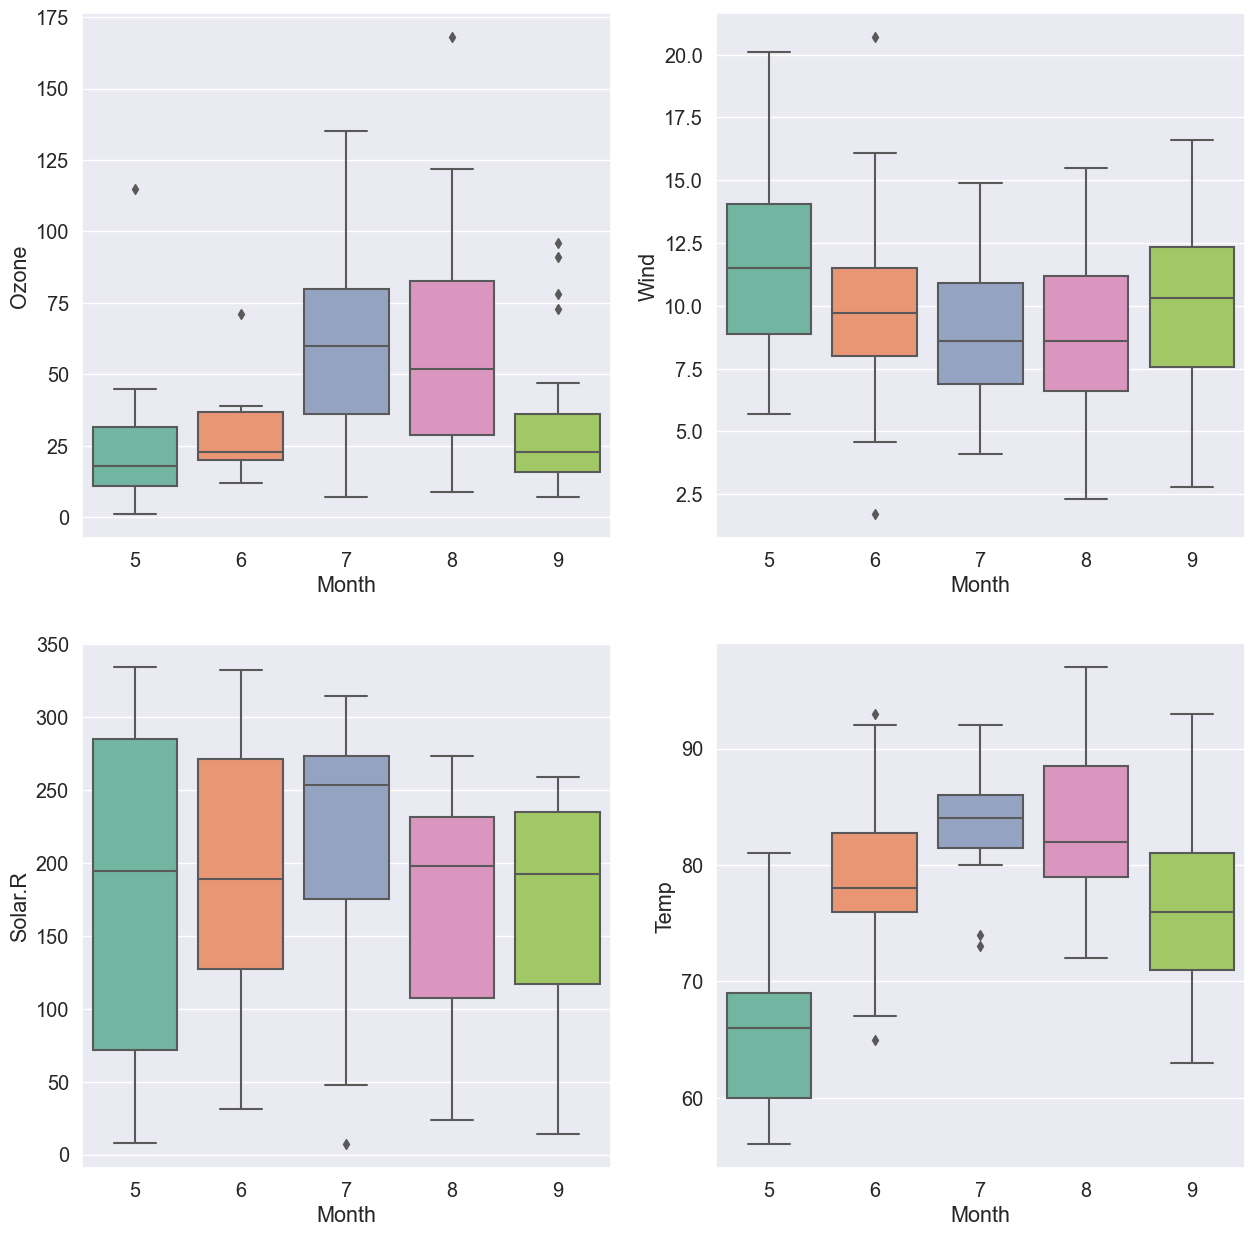

In [6]:
# ваш код
fig, ax = plt.subplots(2,2, figsize=(15,15))

for i,feature in enumerate(['Ozone','Solar.R','Wind','Temp']):
    sns.boxplot(x='Month', y = feature,data = df,ax=ax[i%2,i//2])

Опишите структуру `boxplot`. Какие выводы можно сделать в данном случае?

**Ответ:**
Границы ящика определяются 25 и 75 выборочным процентилем. Черта внутри ящика отсекается по выборочной медиане. Размеры усов определяется либо полуторным размером ящика либо максимальным/минимальным значением по выборке. Если точка выходит за размеры усов она обозначается как точкой выброса.
Существует различные реализации ящика. Например, размеры усов могут определятся 2, 98 выборочным процентилем. 
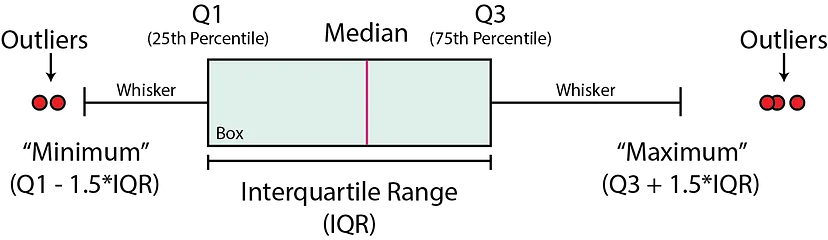


**3.** Для параметра с наибольшим числом наблюдений, признанных выбросами, посчитайте и сравните: 
- выборочное среднее; 
- выборочную медиану;

In [7]:
df.groupby(['Month'])['Ozone'].agg(['mean','median',mean_std])

,mean,median,sem
Month,,,
5,23.62,18.00,4.36
6,29.44,23.00,6.07
7,59.12,60.00,6.20
8,59.96,52.00,7.78
9,31.45,23.00,4.48


Какими свойствами статистик вызваны наблюдаемые различия?

**Ответ:**

Медиана определяется порядком в вариационном ряду для выборки. Среднее зависит от значений признака.  

Потому выбросы имеющие аномальные значения искажают среднее больше чем медиану.

При подсчете этих статистик обычно предполагается, что наблюдения независимы. Выполнено ли это свойство в данном случае?

**Ответ:**
Исходя из boxplot, видим что распределения наблюдений озона изменяются во времени. Предполагаю, что существует дифференциальное уравнение, связывающее значения в предыдущий момент времени с новым. Следовательно, нельзя говорить о независимости наблюдений.  


А оно часто бывает выполнено? Как это можно проверить? Что бывает, когда оно нарушается? Какие вы есть количественные меры зависимости между признаками? Ответы на эти вопросы вы узнаете далее, но задуматься и порассуждать полезно уже сейчас.

**Ответ:**
Зависит от области применения статистического анализа. Например, датасеты в computer vision для распознавания изображений содержат независимые сэмплы. Когда анализируем покупки в продуктовом магазине, предположение как правило разрушается. Клиенты купившие вчера порошок для стирки, вряд ли купят его сегодня :smile:

Проверить зависимость можно с помощью переходной матрицы из теории марковских переходов. Нарушается условия применения ЦПТ И ЗБЧ, оценки теряют свойство состоятельности и асимптотической нормальности. Коэффициент корреляция, ранговый модификации Пирсона, Кендалла.



Сделайте выводы о полезности робастных статистик, методах визуального анализа и о наличии независимых одинаково распределённых случайных величин в реальном мире.



**Вывод:**
Робастные статистики и методы визуального анализа прекрасны для поверхностного анализа случайных величин. Это полезно для кейсов мониторинга, знакомства с предметной сферой.

Существуют методы работы с зависимыми сэмплами. Полезно знать, что выборка состоит либо из зависимых либо независимых сэмплов. Это позволяет выбрать технику работы с данными

## Задача 2
Cкачайте данные <a href="http://archive.ics.uci.edu/ml/datasets/wine">`wine dataset`</a> и рассмотрите столбцы `Alcalinity of ash`, `Nonflavanoid phenols`, `Proanthocyanins` и `Hue` для вина *первого типа*. Тип вина указан в первом столбце. Для работы с табличными данными используйте библиотеку `pandas`.

Постройте доверительные интервалы для параметров сдвига каждого из столбцов, предполагая, что столбцы имеют нормальное распределение.
Требуется построить: 
 * асимтотические доверительные интервалы при помощи центральной предельной теоремы;
 * точные неасимптотические при помощи распределений хи-квадрат, Стьюдента.

 
 Запишите их в виде таблицы.

In [8]:
# ваш код
import pandas as pd
df = pd.read_csv('wine.data',header=None)

df.columns = [
    'Class',
    'Alcohol',
    'Malic acid',
    'Ash',
    'Alcalinity of ash',  
    'Magnesium',
    'Total phenols',
    'Flavanoids',
    'Nonflavanoid phenols',
    'Proanthocyanins',
    'Color intensity',
    'Hue',
    'OD280/OD315 of diluted wines',
    'Proline'
]
# выбираем первый тип

df = df[df.Class == 1].drop('Class',axis=1)

df

,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline
0,14.23,1.71,2.43,15.60,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,13.20,1.78,2.14,11.20,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,13.16,2.36,2.67,18.60,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,14.37,1.95,2.50,16.80,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,13.24,2.59,2.87,21.00,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735
5,14.20,1.76,2.45,15.20,112,3.27,3.39,0.34,1.97,6.75,1.05,2.85,1450
6,14.39,1.87,2.45,14.60,96,2.50,2.52,0.30,1.98,5.25,1.02,3.58,1290
7,14.06,2.15,2.61,17.60,121,2.60,2.51,0.31,1.25,5.05,1.06,3.58,1295
8,14.83,1.64,2.17,14.00,97,2.80,2.98,0.29,1.98,5.20,1.08,2.85,1045
9,13.86,1.35,2.27,16.00,98,2.98,3.15,0.22,1.85,7.22,1.01,3.55,1045


In [9]:
# count nans in dataset
df.isna().sum()

Alcohol                         0
Malic acid                      0
Ash                             0
Alcalinity of ash               0
Magnesium                       0
Total phenols                   0
Flavanoids                      0
Nonflavanoid phenols            0
Proanthocyanins                 0
Color intensity                 0
Hue                             0
OD280/OD315 of diluted wines    0
Proline                         0
dtype: int64

In [10]:
import tensorflow_probability as tfp
import numpy as np
import scipy.stats as sps

tfd = tfp.distributions

alpha = 0.95


def calculate_asymptotic_confidence_intervals(sample, alpha=0.95):
    """
    Функция для вычисления асимптотического доверительного интервала
    param sample: выборка,
    param alpha: уровень доверия

    return: асимптотический доверительный интервал
    """
    mean = np.mean(sample)
    std_mean = sps.sem(sample)
    quantile = tfd.Normal(loc=0, scale=1).quantile((1 + alpha) / 2).numpy()
    # ваш код
    return (mean - std_mean * quantile, mean + std_mean * quantile)


def calculate_confidence_intervals(sample, alpha=0.95):
    """
    Функция для вычисления неасимптотического доверительного интервала
    param sample: выборка,
    param alpha: уровень доверия

    return: неасимптотический доверительный интервал
    """
    mean = np.mean(sample)
    std_mean = sps.sem(sample)
    degrees_of_freedom = len(sample) - 1
    quantile = (
        tfd.StudentT(degrees_of_freedom, loc=0, scale=1)
        .quantile((1 + alpha) / 2)
        .numpy()
    )
    # ваш код
    return (mean - std_mean * quantile, mean + std_mean * quantile)


columns = [
    "left_asymp_conf_interval",
    "right_asymp_conf_interval",
    "left_conf_interval",
    "right_conf_interval",
]


result_df = pd.concat(
    [
        *calculate_asymptotic_confidence_intervals(df, alpha=0.95),
        *calculate_confidence_intervals(df, alpha=0.95),
    ],
    axis=1,
)

result_df.columns = columns

result_df["asympt_conf_interval"] = (
    "("
    + result_df["left_asymp_conf_interval"].apply(lambda x: '{0:.4f}'.format(x))
    + ","
    + result_df["right_asymp_conf_interval"].apply(lambda x: '{0:.4f}'.format(x))
    + ")"
)

result_df["conf_interval"] = (
    "("
    + result_df["left_conf_interval"].apply(lambda x: '{0:.4f}'.format(x))
    + ","
    + result_df["right_conf_interval"].apply(lambda x: '{0:.4f}'.format(x))
    + ")"
)


result_df[['asympt_conf_interval',"conf_interval"]]
# result_df = result_df["period"] = df["Year"].astype(str) + df["quarter"]


c:\Users\bug\AppData\Local\Programs\Python\Python310\lib\site-packages\numpy\core\fromnumeric.py:3430: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)
c:\Users\bug\AppData\Local\Programs\Python\Python310\lib\site-packages\numpy\core\fromnumeric.py:3430: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)


,asympt_conf_interval,conf_interval
Alcohol,"(13.6268,13.8627)","(13.6243,13.8652)"
Malic acid,"(1.8350,2.1864)","(1.8312,2.1901)"
Ash,"(2.3976,2.5136)","(2.3964,2.5148)"
Alcalinity of ash,"(16.3876,17.6870)","(16.3737,17.7009)"
Magnesium,"(103.6600,109.0180)","(103.6029,109.0750)"
Total phenols,"(2.7537,2.9267)","(2.7518,2.9285)"
Flavanoids,"(2.8809,3.0838)","(2.8788,3.0860)"
Nonflavanoid phenols,"(0.2721,0.3079)","(0.2717,0.3083)"
Proanthocyanins,"(1.7942,2.0045)","(1.7919,2.0067)"
Color intensity,"(5.2123,5.8443)","(5.2055,5.8511)"


Сделайте выводы по полученной таблице.

**Вывод:** границы интервалов отличаются на десятые процента. В данном кейсе необходимости в построении точных доверительных интервалов нет, информация о среднем значении

## Задача 3

Постройте плотность стандартного **нормального распределения** и стандартного **распределения Коши**. Видим, что распределение Коши обладает более тяжелыми хвостами, нежели нормальное.

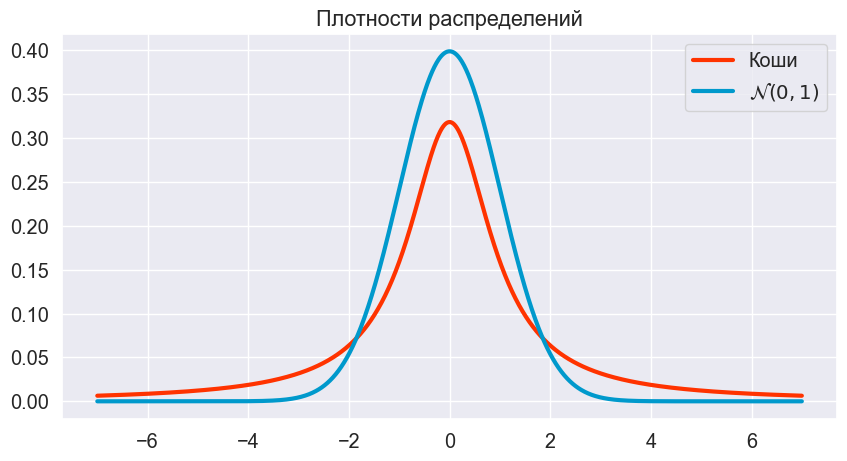

In [11]:
import matplotlib.pyplot as plt
grid = np.linspace(-7, 7, 1000)

plt.figure(figsize=(10, 5))
plt.plot(grid, sps.cauchy.pdf(grid), color=red, label='Коши', lw=3)
plt.plot(grid, sps.norm.pdf(grid), color=blue, 
         label='$\mathcal{N}(0, 1)$', lw=3)
plt.title('Плотности распределений')
plt.legend();

Сгенерируйте $10^5$ выборок размера 30 из стандартного **нормального распределения**.

In [12]:
# ваш код
X_norm = sps.norm.rvs(size=(10**5,30))


По каждой выборке из 30 элементов посчитайте выборочные средние. Далее по ним постройте гистограмму и плотность стандартного нормального распределения. Какой вывод вы можете сделать из полученного графика?

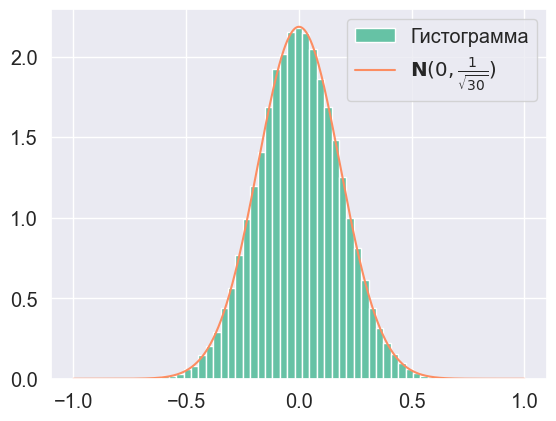

In [13]:
# ваш код
plt.hist(X_norm.mean(axis=1),density=True,bins=50,label='Гистограмма')
grid = np.linspace(-1,1,1000)
plt.plot(grid,sps.norm(loc=0,scale = 1/30**0.5).pdf(grid),label=r'$\mathbf{N}(0,\frac{1}{\sqrt{30}})$')
plt.legend()

**Вывод:** Выборочное среднее имеет нормальное распределение.  

Сгенерируем $10^5$ выборок размера 30 из стандартного **распределения Коши**.

In [14]:
# ваш код
X_cauchy = sps.cauchy.rvs(size=(10**5,30))

Построим аналогичный график. 

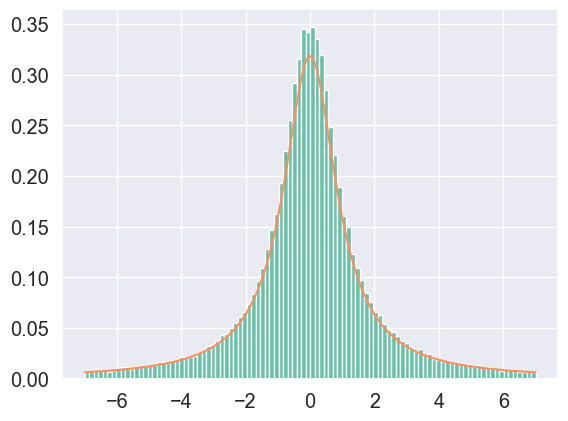

In [15]:
# ваш код
plt.hist(X_cauchy.mean(axis=1),density=True,bins=100,range=(-7,7))
grid = np.linspace(-7,7,1000)
plt.plot(grid,sps.cauchy.pdf(grid))

Сравните графики для нормального распределения и для Коши, опишите ваше сравнение в выводе по задаче.

**Вывод:**
Можно показать, что выборочное среднее для распределения Коши также имеет распределение Коши. Дисперсия при усреднении не уменьшается :anguished:
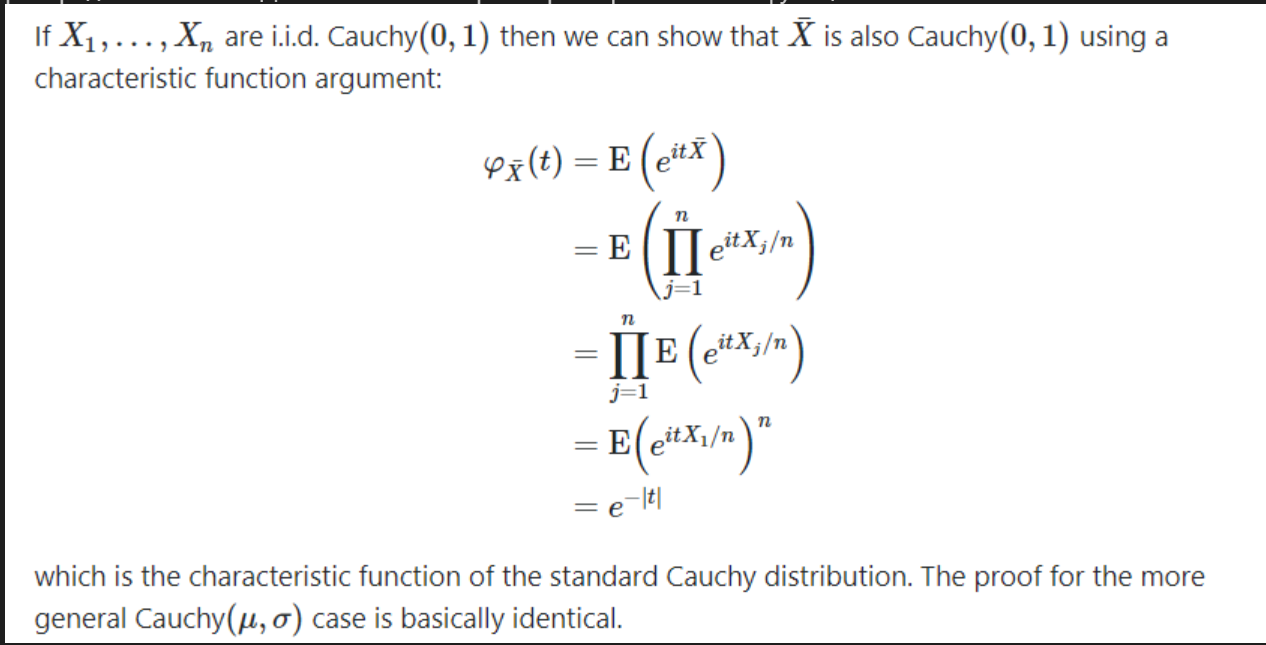

При построении графика наблюдал значения среднего по модулю больше 10000. Для визуализации ограничил область построения отрезком [-7,7]


### <b><font color="orange">Сложная часть</font></b>

## Задача 4

В этой задаче нужно визуализировать доверительные интервалы для выборки из равномерного распределения $U[0, \theta]$.


1. Постройте асимптотический доверительный интервал для $\theta$, используя асимптотически нормальную оценку $\theta$.




**Ответ:**

ИЗ ЦПТ: $\sqrt{n} (\overline{X} - \frac{\theta}{2}) \xrightarrow{d} \mathbf{N}(0,\theta^2/12)$. Оценка $2\overline{X} $ асимптотически нормальна с асимптотической дисперсией $\theta^2/3$.

2. Постройте точный доверительный интервал для $\theta$, используя статистику $X_{(n)}$.

    - Найдите функцию распредления $X_{(n)}$ по определению. 
    - Точный доверительный интервал для $\theta$ имеет смысл строить в виде $(X_{(n)}, X_{(n)} + c_{\alpha})$ (поясните почему). 
    - Нужно найти такое $c_{\alpha}$, что $\mathsf{P_{\theta}}(\theta \in (X_{(n)}, X_{(n)} + c_{\alpha})) = \alpha$ 

**Ответ:**
Функция распределения F для $X_{(n)}$:

$F(t) = P({X_{(n)} } < t) = P(x_1 \in (-\infty,t],...,x_n \in (-\infty,t]) = (\frac{t}{\theta})^n$

Из вида распределения следует, что $\theta > X_{(n)}$. Следовательно можем упростить запись интервальной оценки:

$$P_\theta(X_{(n)} < \theta < X_{(n)} + c_\alpha) = P_\theta( \theta < X_{(n)} + c_\alpha)$$

$$P_\theta( \theta - c_\alpha < X_{(n)} ) = 1 - P_\theta( \theta - c_\alpha > X_{(n)} ) = 1 - F(\theta - c_\alpha) =  1-(\frac{\theta - c_\alpha}{\theta})^n$$

Находим $c_\alpha$:

$$\alpha = 1-(\frac{\theta - c_\alpha}{\theta})^n $$

$$\frac{c_\alpha}{\theta} = 1 - \sqrt[n]{1-\alpha} \xrightarrow{alpha \rightarrow 1 } \frac{1-\alpha}{n}$$


Визуализируйте интервалы. Для этого сгенерируйте выборку $X_1, ... X_{N}, N = 100$ и постройте график доверительных интервалов уровня доверия $0.95$, вычисленных для всех подвыборок размера $n$ вида $X_1, ... X_n$, $1 \le n \le 100$, используя написанную ниже функцию. Нужно нанести на график точки выборки.

Для вычисления квантилей у каждого распределения из `scipy.stats` используйте функцию `ppf`.

In [41]:
def draw_confidence_interval(
    left, right, estimation=None, sample=None, 
    ylim=(None, None), color_estimation='#FF3300', color_interval='#00CC66', 
    color_sample='#0066FF', label_estimation='Оценка',
    interval_label = 'Доверительные интервалы',
    title = '',
    ax = None
):
    import matplotlib.pyplot as plt
    '''
    Рисует доверительный интервал и оценку в зависимости от размера выборки.
    
    :param left: левые границы интервалов (в зависимости от n)
    :param right: правые границы интервалов (в зависимости от n)
    :param estimation: оценки (в зависимости от n)
    :param sample: выборка
    :param ylim: ограничение вертикальной оси
    :param estim_label: подпись к оценке
    :param sample_label: подпись к выборке
    :param color: цвет, которым будет отображен доверительный интервал
    '''

    time = np.arange(len(left)) + 1

    
    
    assert len(time) == len(right)

    estimation_flg = estimation is not None and sample is not None
    if estimation_flg :
        estimates = np.empty(len(time))
        for i in range(len(time)):
            estimates[i] = estimation(sample[:i+1])

    if ax is not None:
        if estimation_flg:
            ax.plot(time,estimates,color=color_estimation,label= label_estimation)
        ax.fill_between(time,left,right, color = color_interval, alpha=0.2,label = interval_label)
        ax.plot(time+1,sample[time],'.',color=color_sample)
        ax.legend()
        ax.set(ylim=ylim, xlabel = 'Размер выборки', title = f'Зависимость доверительного интервала от размера выборки для оценки через {title}')
    else: 
    # ваш код
        if estimation_flg:
            plt.plot(time,estimates,color=color_estimation,label= label_estimation)
        plt.fill_between(time,left,right, color = color_interval,alpha=0.2, label = interval_label)
        plt.plot(time+1,sample[time],'.',color=blue)
        plt.legend(fontsize=16)
        plt.ylim(ylim) 
        plt.xlabel('Размер выборки')
        plt.title('Зависимость доверительного интервала от размера выборки')
        plt.grid()
    
    # ваш код

**Решение:**

In [20]:
import scipy.stats as sps
import numpy as np

def two_mean_estimator(X):
    return 2*X.mean(axis=0)

def last_value_estimator(X):
    return X.max(axis=0)

def aci_mean_estimator(samples,alpha=0.95):
    Z = sps.norm.ppf((1+alpha)/2)
    n = len(samples)
    estim = two_mean_estimator(samples)
    return (estim*( 1- Z/ 3**0.5 / n**0.5),estim*(1 + Z/3**0.5/n**0.5))

def ci_last_value_estim(samples,alpha=0.95):
    estim = last_value_estimator(samples)
    n = len(samples)
    return (estim,estim*(2 - (1 - alpha)**(1/n)))


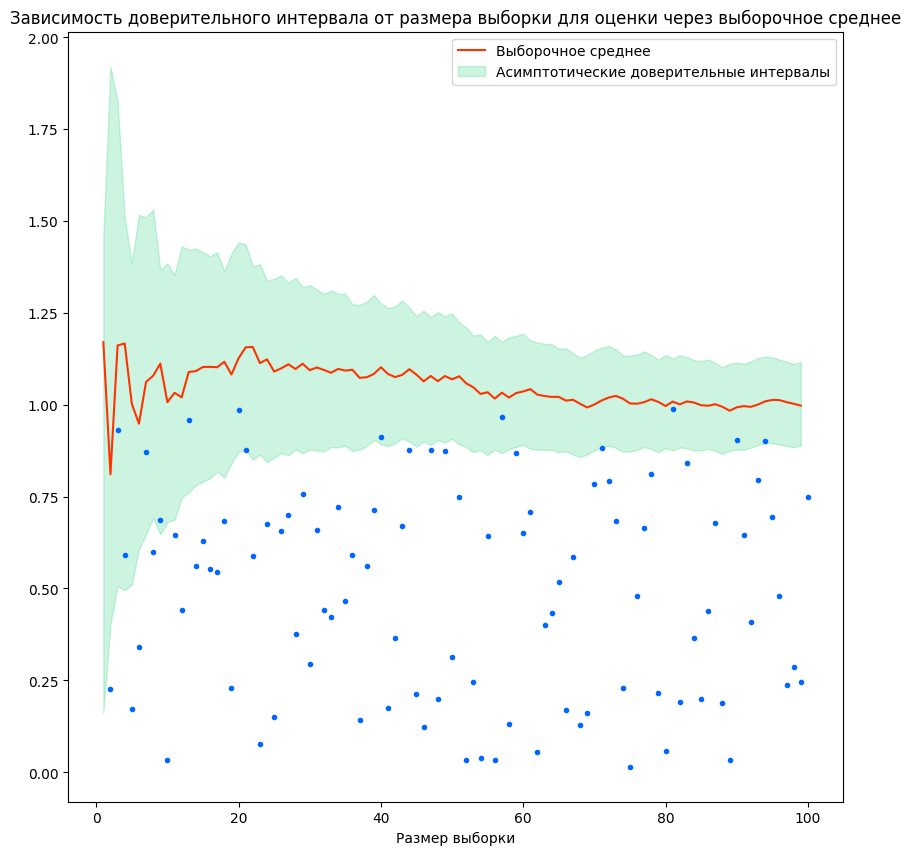

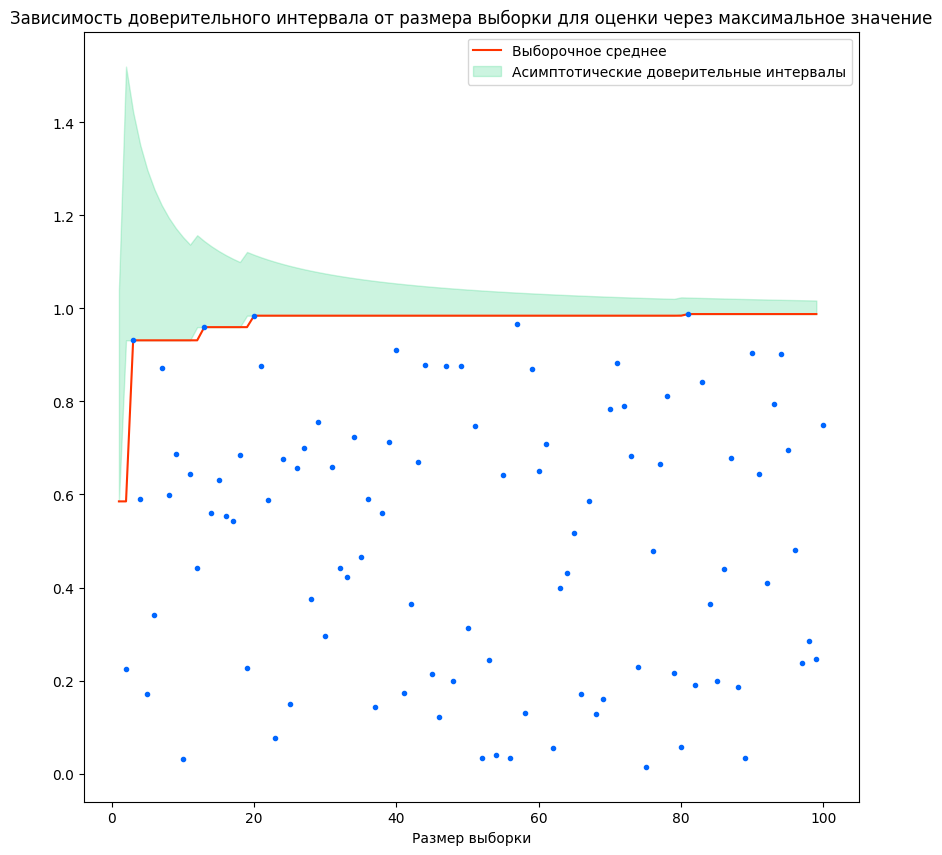

In [42]:
# ваш код
samples = sps.uniform(loc=0,scale=1).rvs(size=100)

aci, ci = [], [] 

for i in range(1,len(samples)):
    aci.append(aci_mean_estimator(samples[:i+1]))
    ci.append(ci_last_value_estim(samples[:i+1]))

left_aci, right_aci = zip(*aci)
left_ci, right_ci = zip(*ci)

fig,ax = plt.subplots(1,1,figsize=(10,10))

draw_confidence_interval(
    left = left_aci,
    right = right_aci,
    ax = ax,
    estimation = two_mean_estimator,
    sample = samples,
    interval_label = 'Асимптотические доверительные интервалы',
    label_estimation = 'Выборочное среднее',
    title = 'выборочное среднее'
)

plt.plot()
fig,ax = plt.subplots(1,1,figsize=(10,10))

draw_confidence_interval(
    left = left_ci,
    right = right_ci,
    ax = ax,
    estimation = last_value_estimator,
    sample = samples,
    interval_label = 'Асимптотические доверительные интервалы',
    label_estimation = 'Выборочное среднее',
    title = 'максимальное значение'
)


**Вывод:**


## Задача 5


Предлагается изучить некоторые свойства распределения Коши с параметром сдвига $\theta$, обладающего плотностью распределения $p_{\theta}(x) = \frac{1}{\pi \left(1 + \left(x- \theta\right)^2\right)}$.

На высоте 1 метр от точки $\theta$ находится источник $\gamma$-излучения, 
причем направления траекторий $\gamma$-квантов случайны, т.е. равномерно распределены по полуокружности. Тогда $X_i, i=1,...,n$ — зарегистрированные координаты точек пересечения $\gamma$-квантов с поверхностью детекторной плоскости — образуют выборку из распределения Коши со сдвигом $\theta$.

**1.** На отрезке $[-7, 7]$ постройте плотность стандартного нормального распределения и стандартного распределения Коши. Не забудьте добавить легенду.

**Решение:**

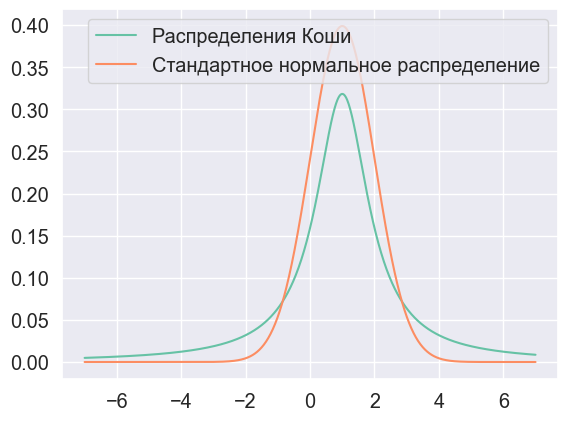

In [18]:
import tensorflow_probability
tbd = tensorflow_probability.distributions


Cauchy = tbd.Cauchy(loc=1,scale=1)
Normal = tbd.Normal(loc=1,scale=1)

x = np.linspace(-7,7,1000)

plt.plot(x, Cauchy.prob(x),label='Распределения Коши')
plt.plot(x, Normal.prob(x),label='Стандартное нормальное распределение')
plt.legend()

**Вывод:**

**2.** Чему равна асимптотическая дисперсия $\sigma_{\alpha}^2$ усеченного среднего $\overline{X}_{\alpha}$, где $0 < \alpha < 1/2$, для распределения Коши? Помочь в ее вычислении может теорема, упомянутая на лекциях. Посчитайте асимптотическую дисперсию аналитически. Постройте график зависимости асимптотической дисперсии $\sigma_{\alpha}^2$ усеченного среднего $\overline{X}_{\alpha}$, где $0 < \alpha < 1/2$, от $\alpha$.

Настройте видимую область графика по оси *y* так, чтобы четко была отображена информативная часть графика. Отметьте на графике минимум функции.

**Решение:**

Асимптотическая дисперсия $\sigma^2_\alpha$ усеченного среднего $\overline{X}_\alpha$ равна:


$$ \sigma_\alpha^2 = \frac{2}{(1-2\alpha)^2}\int_{0}^{y_{1-\alpha}} t^2 f(t) dt +\alpha y_{1-\alpha}^2$$

Подставляем $f(t) = \frac{1}{\pi(1+t^2)}$:

$\sigma^2_\alpha = \frac{2}{\pi(1-2\alpha)^2}(y_{1-\alpha}-tan^{-1}(y_{1-\alpha})) + \alpha \cdot y_{1-\alpha}^2$



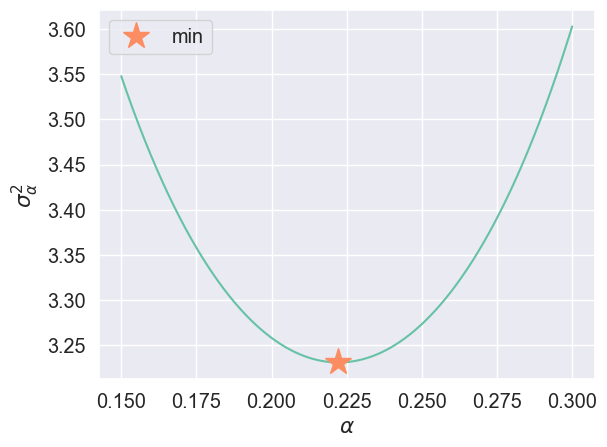

In [43]:
alpha = np.linspace(0.15,0.3,1000)

quantiles = tbd.Cauchy(loc=1,scale=1).quantile(1-alpha)

sigma = 2 / np.pi/ (1 - 2*alpha)**2 * (quantiles - np.arctan(quantiles)) + alpha * quantiles **2

min_ind = np.argmin(sigma)

plt.plot(alpha,sigma)
plt.xlabel(r'$\alpha$')
plt.ylabel(r'$\sigma^2_\alpha$')
plt.plot(alpha[min_ind],sigma[min_ind],'*', markersize=20,label = 'min')
plt.legend()

При каком значении $\alpha$ асимптотическая дисперсия $\sigma^2_{\alpha}$ минимальна и чему она равна? Ответ можно найти численно.

In [44]:
# бинарный поиск
import scipy

alpha = np.linspace(0.2,0.3,1000)

def func(alpha):
    quantiles = tbd.Cauchy(loc=1,scale=1).quantile(1-alpha).numpy()
    return 2 / np.pi/ (1 - 2*alpha)**2 * (quantiles - np.arctan(quantiles)) + alpha * quantiles **2

# находим решение с точностью до 1e-10
scipy.optimize.minimize_scalar(func,bounds=(0.2,0.3))

 message: Solution found.
 success: True
  status: 0
     fun: 3.231227308251216
       x: 0.22229700527367036
     nit: 11
    nfev: 11

**Ответ:** Оптимальное значение дисперсии для оценки среднего достигается при исключении 44% выборки. Результат выглядит контруитивно - большая часть собранных данных не используется :scream:.

**3.** Сгенерируйте выборку $X = \left(X_1, \dots, X_{1000} \right)$ из стандартного распределения Коши. Для всех $n \leqslant 1000$ по первым $n$ элементам выборки $X_1, \dots, X_n$ вычислите значения следующих оценок:
- $\overline{X}$  —  выборочное среднее;
- $\overline{X}_{\alpha}$ —  усеченное среднее, где $\alpha$ &mdash; значение, на котором достигается минимум $\sigma^2_{\alpha}$;
- $\widehat{\mu}$ —  выборочная медиана;

На графиках изобразите зависимость значений **всех оценок** от $n$ для одной реализации выборки, а на другом графики траекторий по нескольким реализациям. 

Постройте также график, на котором изобразите значения MSE для каждой оценки от размера выборки $n$.

*Указание:* $MSE_{\widehat{\theta}}(\theta) = (\widehat{\theta} - \theta)^2$. В качестве $\theta$ возьмите истинное значение для стандартного распределения Коши. Для подсчета усеченного среднего можно использовать функцию `scipy.stats.trim_mean`.

Сравните асимптотические дисперсии оценок. Сделайте вывод.

**Решение:**

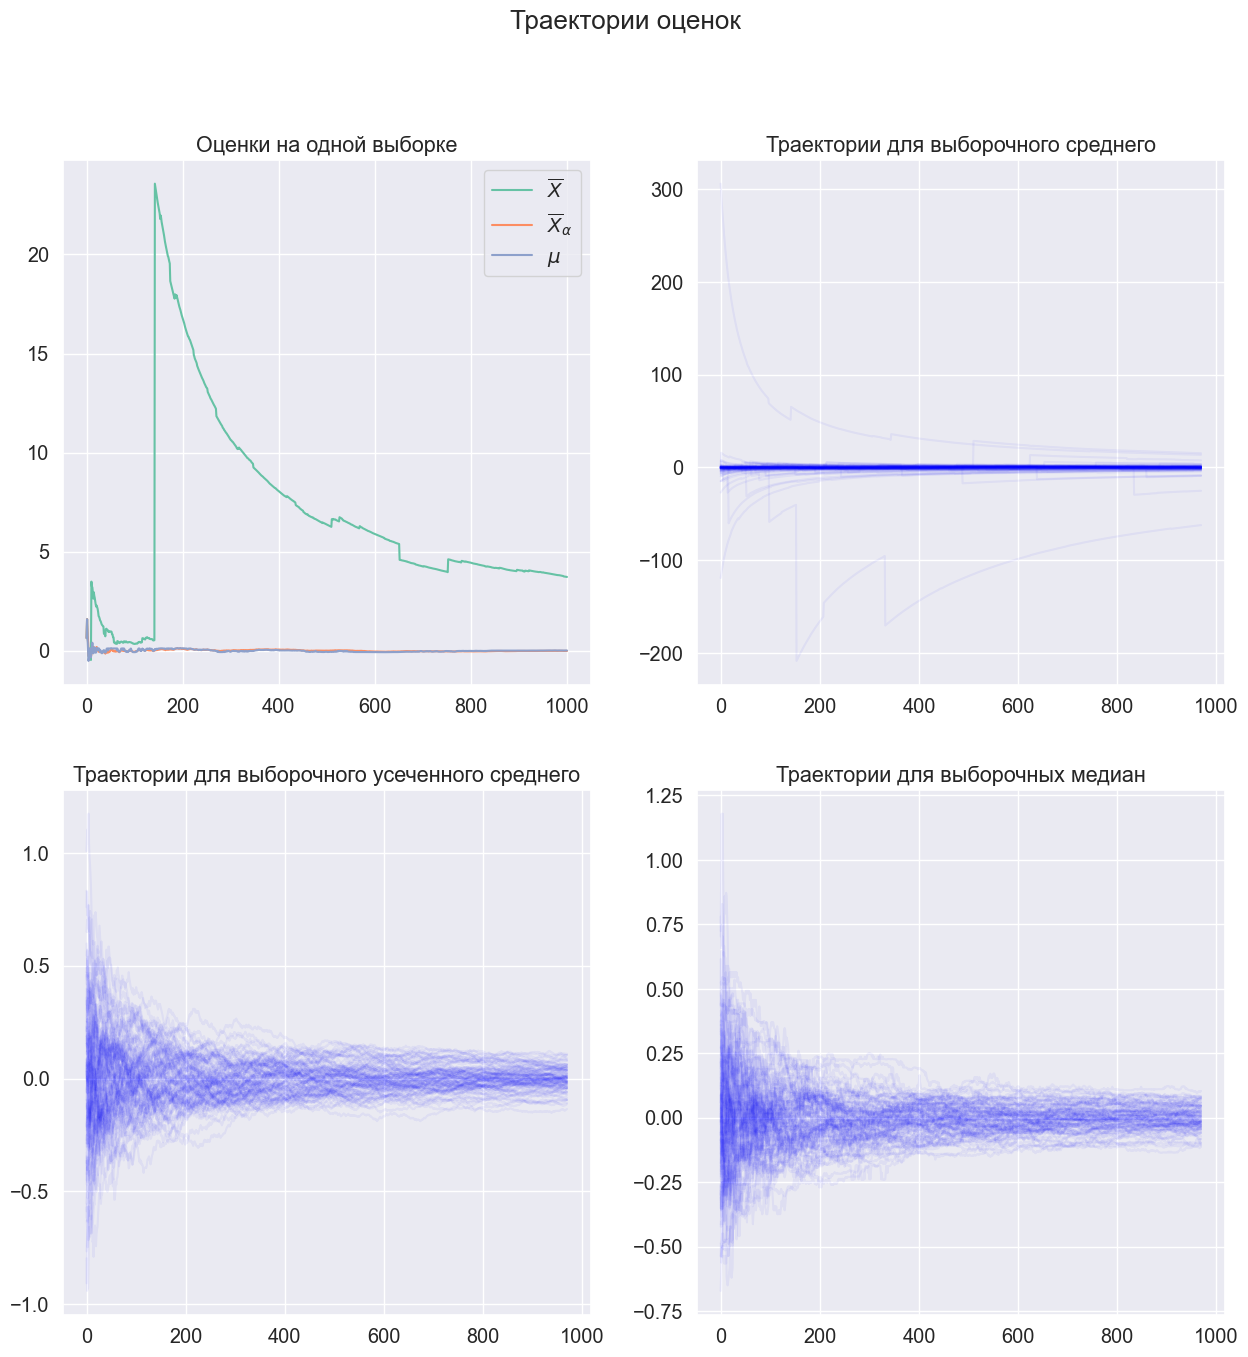

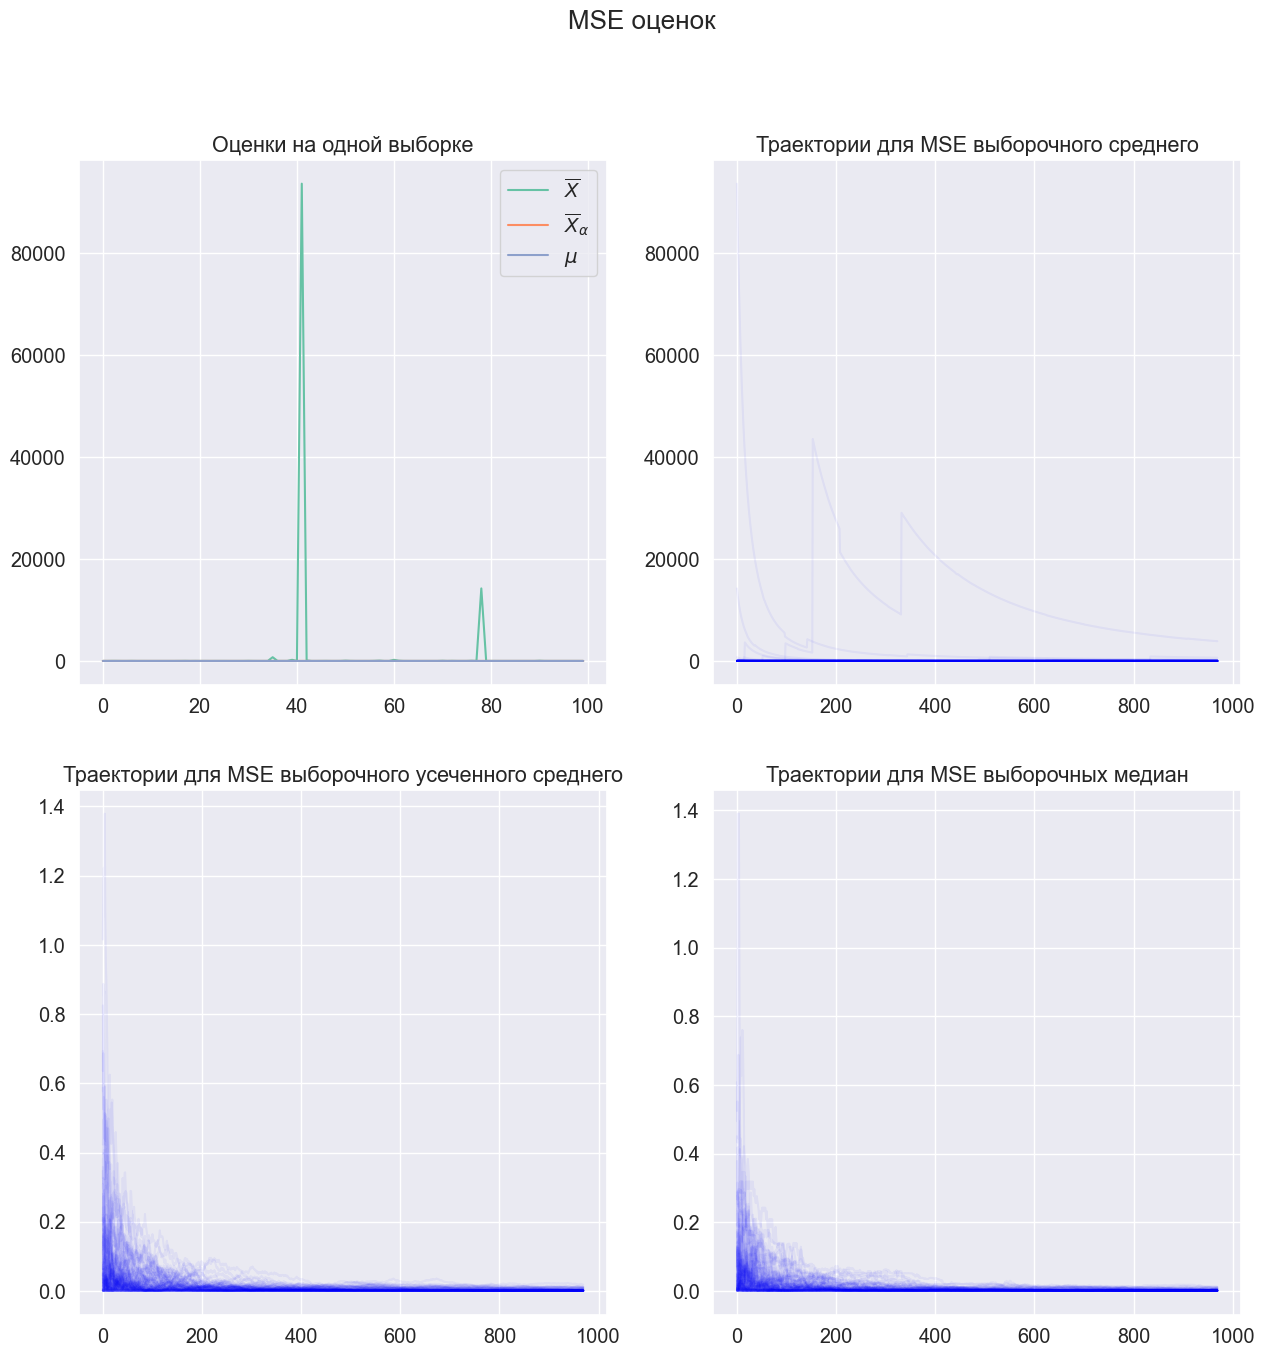

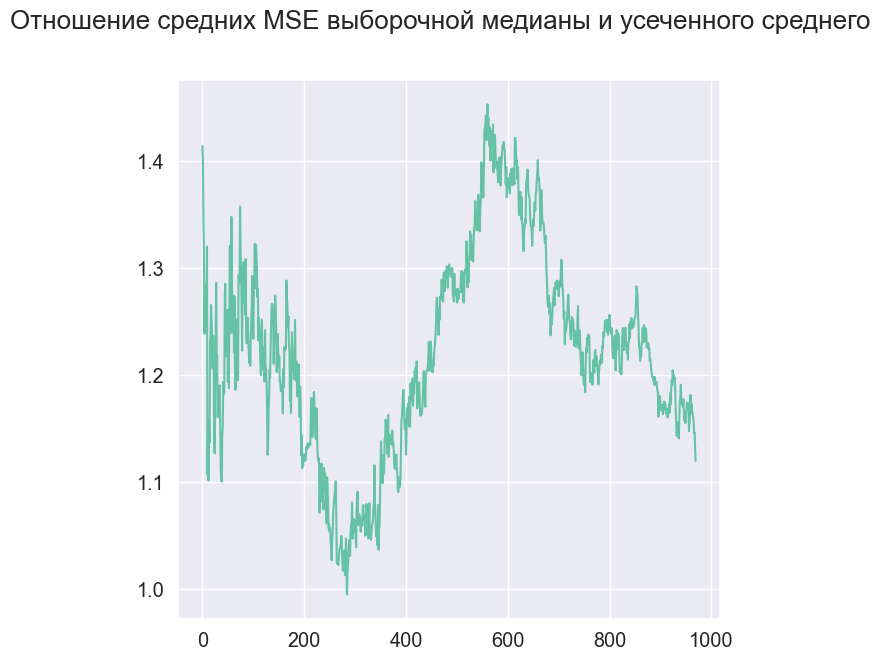

In [51]:
alpha = 0.22229700527367036

X = sps.cauchy.rvs(size=1000)
means, trim_means, medians = [], [], []

for i in range(1000):
    means.append(X[:i+1].mean()) 
    trim_means.append(sps.trim_mean(X[:i+1],alpha))
    medians.append(np.median(X[:i+1])) 


fig,ax = plt.subplots(2,2,figsize=(15,15))

fig.suptitle('Траектории оценок')

ax[0,0].plot(means,label=r'$\overline{X}$')
ax[0,0].plot(trim_means,label=r'$\overline{X}_\alpha$')
ax[0,0].plot(medians,label=r'$\mu$')
ax[0,0].legend()
ax[0,0].set(title='Оценки на одной выборке')

X = sps.cauchy.rvs(size=(1000,100))
means, trim_means, medians = [], [], []
for i in range(30,1000):
    means.append(X[:i+1].mean(axis=0)) 
    trim_means.append(sps.trim_mean(X[:i+1],alpha,axis=0))
    medians.append(np.median(X[:i+1],axis=0)) 

means, trim_means, medians  = np.array(means),np.array(trim_means), np.array(medians)

ax[0,1].plot(means,alpha=0.05,color='blue')
ax[0,1].set(title='Траектории для выборочного среднего')
ax[1,0].plot(trim_means,alpha=0.05,color='blue')
ax[1,0].set(title='Траектории для выборочного усеченного среднего')
ax[1,1].plot(medians,alpha=0.05,color='blue')
ax[1,1].set(title='Траектории для выборочных медиан')
plt.plot()

fig,ax = plt.subplots(2,2,figsize=(15,15))

fig.suptitle('MSE оценок')

ax[0,0].plot(means[0]**2,label=r'$\overline{X}$')
ax[0,0].plot(trim_means[0]**2,label=r'$\overline{X}_\alpha$')
ax[0,0].plot(medians[0]**2,label=r'$\mu$')
ax[0,0].legend()
ax[0,0].set(title='Оценки на одной выборке')


ax[0,1].plot(means**2,alpha=0.05,color='blue')
ax[0,1].set(title='Траектории для MSE выборочного среднего')
ax[1,0].plot(trim_means**2,alpha=0.05,color='blue')
ax[1,0].set(title='Траектории для MSE выборочного усеченного среднего')
ax[1,1].plot(medians**2,alpha=0.05,color='blue')
ax[1,1].set(title='Траектории для MSE выборочных медиан')

plt.plot()

fig,ax = plt.subplots(1,1,figsize=(7,7))
fig.suptitle('Отношение средних MSE выборочной медианы и усеченного среднего')
plt.plot((trim_means**2).mean(axis=1) / (medians**2).mean(axis=1))
None

**Вывод:** <...>

Используем теорему об АНО выборочной медианы:

$$\sqrt{n} (\hat{\mu} - \mu) \xrightarrow{d} \mathrm{N}(0,\frac{1}{4f^2(p)})$$

Для распределения Коши выборочная медиана имеет асимптотическую дисперсию: $\frac{\pi^2}{4} \sim 2.46$

Для усеченного среднего с оптимальным $\alpha$ = 0.327 -  3.231227308251216

Для среднего асимптотическая дисперсия для распределения Коши не определена, поскольку у распределения нет матожидания

Эксперимент подтверждает теоретические выкладки. У траектории среднего случаются выбросы, отклоняющиеся от истинного значения в 1e5 больше раз чем прочие оценки. Дисперсия усеченного среднего больше дисперсии медианы на 30%. В данном приложении оптимального использовать медиану для оценки смещения распределения 
